# Text Clustering with TF-IDF in Python

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np

import re
import string
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Dataset/bbc_news.csv')
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [3]:
df = pd.DataFrame(df, columns=['description'])

In [4]:
df

,description
0,The Ukrainian president says the country will ...
1,"Jeremy Bowen was on the frontline in Irpin, as..."
2,One of the world's biggest fertiliser firms sa...
3,The parents of the Manchester Arena bombing's ...
4,Consumers are feeling the impact of higher ene...
...,...
19035,"At a crisis meeting, France's president condem..."
19036,"The death of 17-year-old Nahel M, during a tra..."
19037,Nahel M's death follows an increase in police ...
19038,"France sees a third night of mass unrest, trig..."


In [5]:
df.shape

(19040, 1)

### Preprocessing

In [6]:
stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [8]:
df['cleaned'] = df['description'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [9]:
df

,description,cleaned
0,The Ukrainian president says the country will ...,ukrainian president says country forgive forge...
1,"Jeremy Bowen was on the frontline in Irpin, as...",jeremy bowen frontline irpin residents came ru...
2,One of the world's biggest fertiliser firms sa...,one world biggest fertiliser firms says confli...
3,The parents of the Manchester Arena bombing's ...,parents manchester arena bombing youngest vict...
4,Consumers are feeling the impact of higher ene...,consumers feeling impact higher energy costs f...
...,...,...
19035,"At a crisis meeting, France's president condem...",crisis meeting france president condemns three...
19036,"The death of 17-year-old Nahel M, during a tra...",death year old nahel traffic stop provoked ang...
19037,Nahel M's death follows an increase in police ...,nahel death follows increase police using fire...
19038,"France sees a third night of mass unrest, trig...",france sees third night mass unrest triggered ...


### TF-IDF Vectorization

In [10]:
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['cleaned'])

In [11]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Implementation of KMeans

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=12)

kmeans.fit(X)

clusters = kmeans.labels_

In [13]:
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [14]:
[c for c in clusters][:10]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 1]

In [15]:
X.shape

(19040, 10000)

### Dimensional Reduction and Visualization -----> PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [17]:
x0.shape

(19040,)

In [18]:
x1.shape

(19040,)

### Visualize the Clustering

In [19]:
# assign clusters and pca vectors to our dataframe
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [20]:
df

,description,cleaned,cluster,x0,x1
0,The Ukrainian president says the country will ...,ukrainian president says country forgive forge...,2,-0.059115,0.005855
1,"Jeremy Bowen was on the frontline in Irpin, as...",jeremy bowen frontline irpin residents came ru...,2,-0.042678,0.010449
2,One of the world's biggest fertiliser firms sa...,one world biggest fertiliser firms says confli...,2,0.045744,-0.025741
3,The parents of the Manchester Arena bombing's ...,parents manchester arena bombing youngest vict...,2,-0.006405,-0.010874
4,Consumers are feeling the impact of higher ene...,consumers feeling impact higher energy costs f...,2,-0.054838,0.019120
...,...,...,...,...,...
19035,"At a crisis meeting, France's president condem...",crisis meeting france president condemns three...,2,-0.010353,-0.003428
19036,"The death of 17-year-old Nahel M, during a tra...",death year old nahel traffic stop provoked ang...,2,-0.041034,0.010042
19037,Nahel M's death follows an increase in police ...,nahel death follows increase police using fire...,2,-0.038246,0.010779
19038,"France sees a third night of mass unrest, trig...",france sees third night mass unrest triggered ...,2,0.000362,-0.007392


Let’s see which are the most relevant keywords for each centroid

In [21]:
def get_top_keywords(n_terms):
    df = pd.DataFrame(X.todense()).groupby(clusters).mean()
    terms = vectorizer.get_feature_names_out()
   
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
        
get_top_keywords(10)


Cluster 0
victory,premier,first,manchester,win,final,league,england,cup,world

Cluster 1
died,least,say,uk,killed,homes,young,million,says,people

Cluster 2
years,russia,us,say,new,ukraine,year,uk,bbc,says


we can rename each cluster with a better label

In [22]:
# map clusters to appropriate labels 
# cluster_map = {0: "a", 1: "b", 2: "c", 3: "d"}

# # apply mapping
# df['cluster'] = df['cluster'].map(cluster_map)

 visualize our grouped texts in a very simple way.

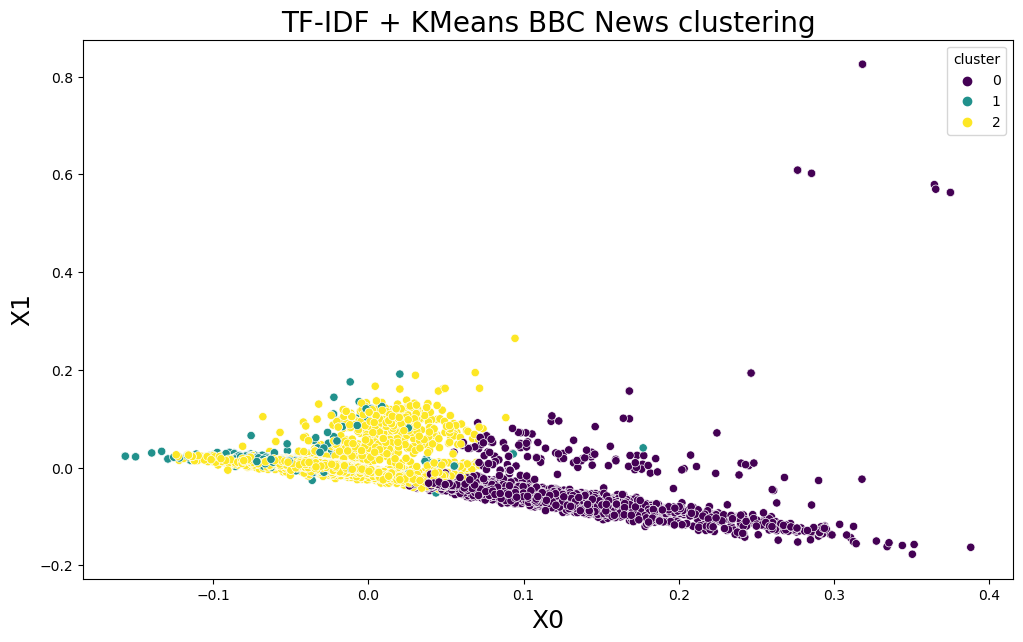

In [23]:
# set image size
plt.figure(figsize=(12, 7))

# set a title
plt.title("TF-IDF + KMeans BBC News clustering", fontdict={"fontsize": 20})

# set axes names
plt.xlabel("X0", fontdict={"fontsize": 18})
plt.ylabel("X1", fontdict={"fontsize": 18})

# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()